In [2]:
import numpy as np
import random
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import norm
# from sklearn.neighbors import KernelDensity

from astropy.visualization import hist

[0.84845074 0.89632205 0.59285969 0.94849139 0.65316607]


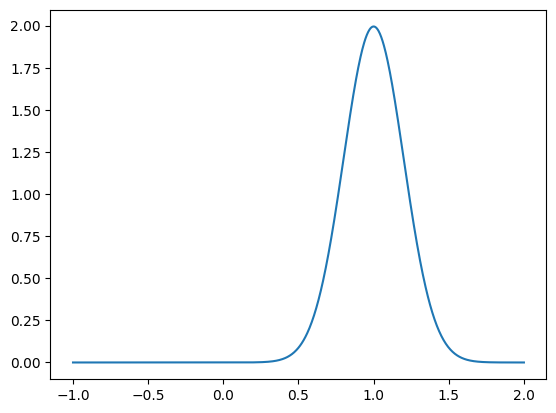

In [30]:
mu=1
sigma=0.2
N=5


samples=norm(mu, sigma).rvs(size=N)
print(samples)
xgrid=np.linspace(-1,2,1000
                  )

plt.plot(xgrid, norm(mu,sigma).pdf(xgrid))

In [48]:
def ML(samples, xgrid, N, sigma):
    L_measurement = []
    for sample in samples:
        distr = norm(sample, sigma)
        L_measurement.append(distr.pdf(xgrid))
        plt.plot(xgrid, distr.pdf(xgrid), label=f'sample={sample:.2f}')
    plt.legend()
    L_measurement = np.array(L_measurement)
    Likelihood = np.prod(L_measurement, axis=0)
    ordinati = np.argsort(Likelihood)
    maximum = ordinati[-1]
    mu_cap = xgrid[maximum]
    return mu_cap, Likelihood




ML estimate from function: 0.7884884884884884
ML estimator: 0.7878579894231443
[0.84845074 0.89632205 0.59285969 0.94849139 0.65316607]


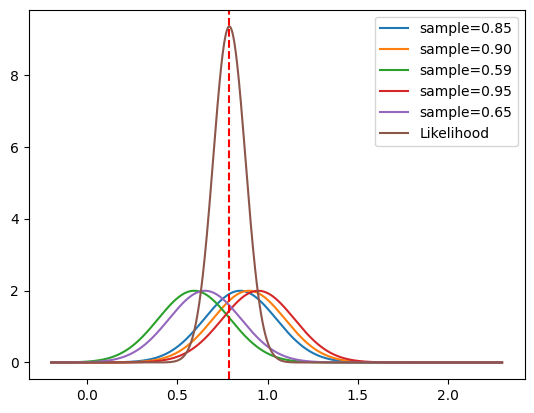

In [49]:
mu_cap, Likelihood= ML(samples, xgrid, N, sigma)
ML_estimator=np.mean(samples)
print("ML estimate from function:", mu_cap)
print("ML estimator:", ML_estimator)
xgrid=np.linspace(-0.2,2.3,1000)
print(samples)
sigma=0.2

plt.plot(xgrid,Likelihood, label='Likelihood')
plt.legend()


plt.axvline(mu_cap, color='red', linestyle='--', label='ML estimate')


In [46]:
#Fisher Matrix
log_likelihood=np.log(Likelihood)



In [ ]:
def Fisher(Log_L, xgrid):
    """
    Fisher information for a Gaussian distribution.
    """
    diff=np.diff(log_likelihood, n=2) # Calculate the second derivative of the log-likelihood
    deltaT_square=(xgrid[1]-xgrid[0])**2
    diff=diff/deltaT_square
    diff2=diff*(-1)
    F=diff2**(-1/2)
    return F[0]

In [57]:

sigma_cap=Fisher(log_likelihood)
print("sigma:", sigma_cap)
print("Fisher estimator:", sigma/np.sqrt(N))

sigma: 0.08944271909958507
Fisher estimator: 0.08944271909999159


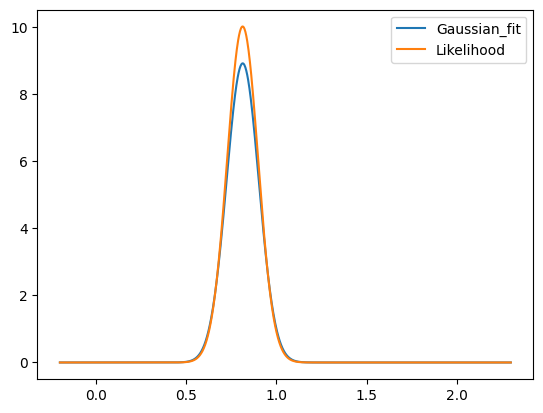

In [52]:
Gaussian=norm(mu_cap, sigma_cap)
A=2
plt.plot(xgrid, A*Gaussian.pdf(xgrid), label='Gaussian_fit')
plt.plot(xgrid, Likelihood, label='Likelihood')
plt.legend()

### part 3

In [67]:
sigma_norm=  norm(loc=0.2, scale=0.02).rvs(size=N)
print("sigma_norm:", sigma_norm)



sigma_norm: [0.22535152 0.22011209 0.18799845 0.20162056 0.23222692]


In [68]:
mu_estimator=np.sum(samples*sigma_norm**(-2))/np.sum(sigma_norm**(-2))
sigma_estimator= 1/(np.sqrt(np.sum(1/sigma_norm**2)))

ML estimate from function with varying sigma: 0.7809809809809809
ML estimator with varying sigma: 0.78220882565782


Text(0.5, 0, 'x')

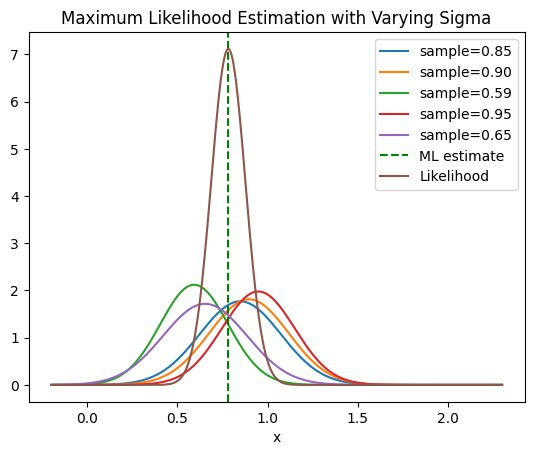

In [69]:
def ML(samples, xgrid, N, sigma):
    L_measurement = []
    for sample, sigma in zip(samples, sigma_norm): # Create a normal distribution for each sample with the corresponding sigma
        distr = norm(sample, sigma)
        L_measurement.append(distr.pdf(xgrid))
        plt.plot(xgrid, distr.pdf(xgrid), label=f'sample={sample:.2f}')
    plt.legend()
    L_measurement = np.array(L_measurement)
    Likelihood = np.prod(L_measurement, axis=0)
    ordinati = np.argsort(Likelihood)
    maximum = ordinati[-1]
    mu_cap = xgrid[maximum]
    return mu_cap, Likelihood

mu_cap, Likelihood = ML(samples, xgrid, N, sigma_norm)
ML_estimator = np.mean(samples)
print("ML estimate from function with varying sigma:", mu_cap)
print("ML estimator with varying sigma:", mu_estimator)
plt.axvline(mu_cap, color='green', linestyle='--', label='ML estimate ')
plt.title('Maximum Likelihood Estimation with Varying Sigma')
plt.plot(xgrid,Likelihood, label='Likelihood')
plt.legend()


plt.xlabel('x')

In [61]:
log_likelihood = np.log(Likelihood)


In [ ]:
sigma_cap=Fisher(log_likelihood)



print("Fisher estimator:", sigma_cap)
print("Fisher estimator with varying sigma:", sigma_estimator)


Fisher estimator: 0.08564769903251329
Fisher estimator with varying sigma: 0.08564769903185357
